In [53]:
import numpy as np

from deepquantiles import MixtureDensityRegressor
from deepquantiles.data import bishop_data
from deepquantiles.nb_utils import vis_model

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use(['dark_background'])
mpl.rcParams["font.size"] = 18

In [29]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from kerashistoryplot.callbacks import PlotHistory

callbacks = [
    ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_delta=0.001, min_lr=0.0001),
    EarlyStopping(monitor='loss', patience=15, min_delta=0.0001),
    PlotHistory(batches=False, n_cols=3, figsize=(15, 7))
]

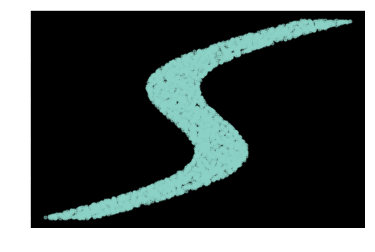

In [45]:
X, y = bishop_data(5000)
plt.plot(X, y, '.', alpha=0.5)

In [47]:
regressor = MixtureDensityRegressor(
    shared_units=(32, 32),
    weight_units=(32, 32),
    mu_units=(32, 32),
    sigma_units=(32, 32),
    lr=0.01,
    batch_size=100,
)

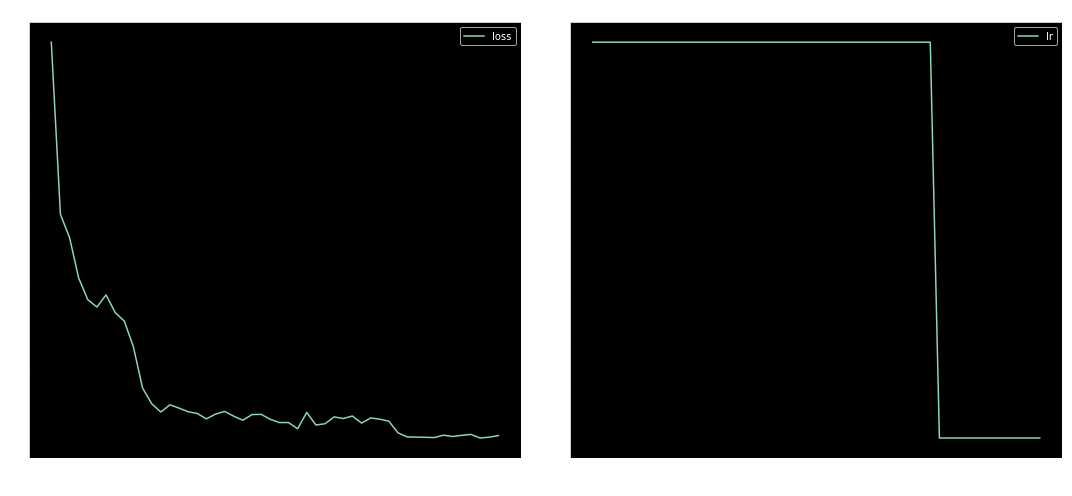

In [48]:
regressor.fit(X, y, epochs=50, callbacks=callbacks)

In [49]:
w, mu, sigma = regressor.predict(X)
mean = regressor.predict_mean(X)

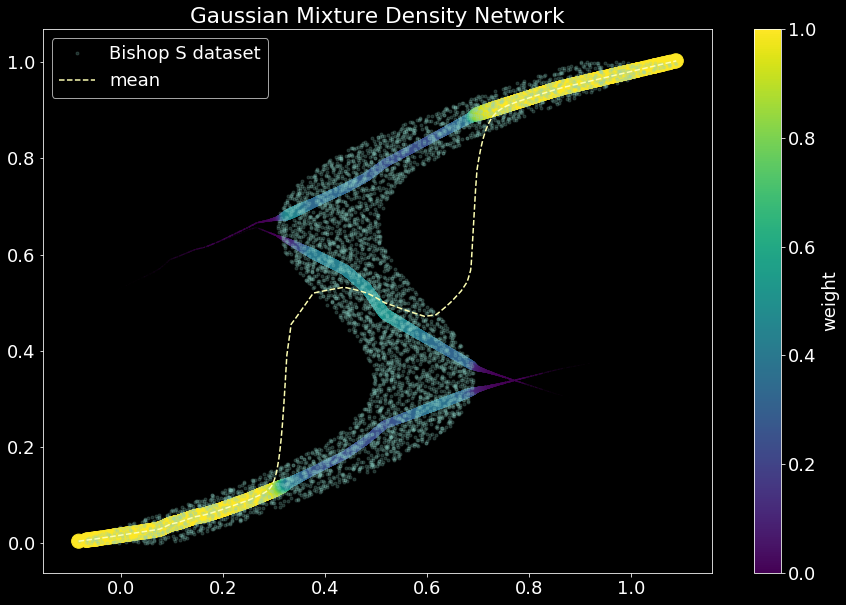

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(X, y, '.', alpha=0.2, label='Bishop S dataset')
plt.plot(X, mean, '--', label='mean')
for i in range(regressor.n_components):
    plt.scatter(X, mu[:, i], c=w[:, i], s=200 * w[:, i], vmin=0, vmax=1)
    # plt.plot(X, mu[:, i] + sigma[:, i], 'w:')
    # plt.plot(X, mu[:, i] - sigma[:, i], 'w:')
plt.colorbar(label='weight')
plt.legend()
plt.title('Gaussian Mixture Density Network')
plt.savefig('mdn.png')

(0, 1.05)

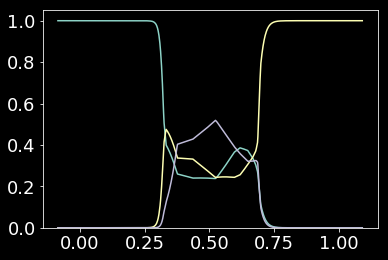

In [62]:
for i in range(regressor.n_components):
    plt.plot(X, w[:, i])
plt.ylim([0, 1.05])